<a href="https://colab.research.google.com/github/MSyahmiAzri/OWTSResultML/blob/main/2023_EDA_RESULT_OWTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING PD MAPPING RESULT**


#Objectives of this project:
1. To predict OWTS (PD mapping) results.
2. To increase hitrate in OWTS testing with limited testing/resources.
3. To reduce nos of MVBD.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Replace the file ID with your own
file_id = '1cuHNX5RwKjBZ-Ky51q18Zi6BoZQkeUmG'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_excel(link)




In [ ]:
df.head()

,BIL,STATION,TEST DATE,SOURCE\nPMU/PPU/SSU,FEEDER NO,TEST FROM,CABLE ID,TEST TO,CABLE TYPE,SIZE (mm2),...,PD TYPE,RECOMMENDATION,RECOMMENDATION (FREE TEXT),MONITORING DURATION,RECTIFICATION DATE,ACTION TAKEN,REMARKS (FREE TEXT),STATUS CABLE,Defect,Done Repair
0,704,BANGI,2022-01-05,KJGU,6,PE TMN MEWAH INDAH,B03423,PE NG TRADING,XLPE,240MMP,...,CONCENTRATION,MONITORING & RETEST,RETEST OWTS,6 BULAN,NaN,NaN,NaN,TEST AFTER REPAIR BDOWN,NO,NO
1,705,BANGI,2022-01-24,SEC9,2,PE BANDAR BARU BANGI 18,B06023,PE RAWATAN SISA AIR SEKSYEN 9,MIXED,240MMP/300MMP,...,SCATTERED,VLF/MWT,VLF/ MWT,6 BULAN,2022-04-08 00:00:00,VLF PASS,NaN,IN SERVICE,YES,YES
2,706,BANGI,2022-01-24,ABBA,4,PE SG MERAB 3,B03804,PE JALAN PBP 4 PRECINT 17,XLPE,240MMP,...,SCATTERED,MONITORING & RETEST,RETEST OWTS,12 BULAN,NaN,NaN,NaN,IN SERVICE,NO,NO
3,707,BANGI,2022-01-25,BRNG,2,PE TASEK KESUMA FASA 3B,B05132,PE TREATMENT PLANT,MIXED,240MMP/300MMP,...,NO PD,MONITORING & RETEST,RETEST OWTS,12 BULAN,NaN,NaN,NaN,IN SERVICE,NO,NO
4,708,BANGI,2022-01-26,UPM,3,PE APARTMENT KANTAN COURT B2,B07766,PE KG AMAN,XLPE,240MMP,...,CONCENTRATION,MONITORING & RETEST,RETEST OWTS,6 BULAN,NaN,NaN,NaN,IN SERVICE,NO,NO


In [ ]:
df.info()
print('Attributes :', len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   BIL                         3887 non-null   object        
 1   STATION                     3890 non-null   object        
 2   TEST DATE                   3890 non-null   datetime64[ns]
 3   SOURCE
PMU/PPU/SSU          3889 non-null   object        
 4   FEEDER NO                   3890 non-null   object        
 5   TEST FROM                   3890 non-null   object        
 6   CABLE ID                    3890 non-null   object        
 7   TEST TO                     3890 non-null   object        
 8   CABLE TYPE                  3890 non-null   object        
 9   SIZE (mm2)                  3890 non-null   object        
 10  CORE                        3890 non-null   object        
 11  LENGTH(m)                   3890 non-null   int64       

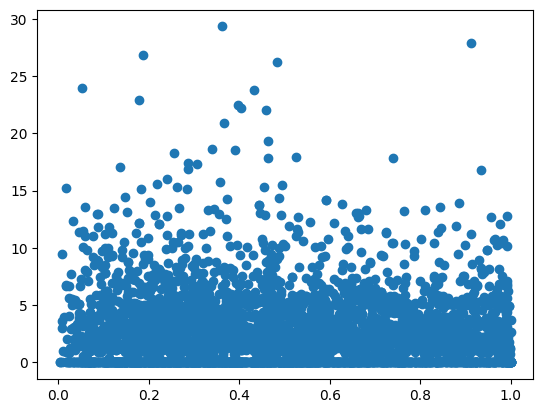

In [ ]:
plt.scatter(df['% UNBALANCED'],df['SEVERITY'])
plt.show()

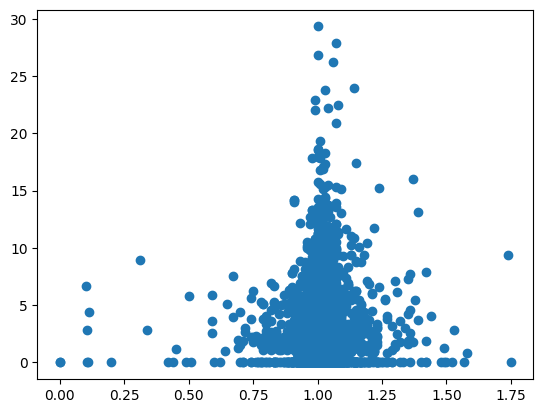

In [ ]:
plt.scatter(df['MIN DAR'],df['SEVERITY'])
plt.show()

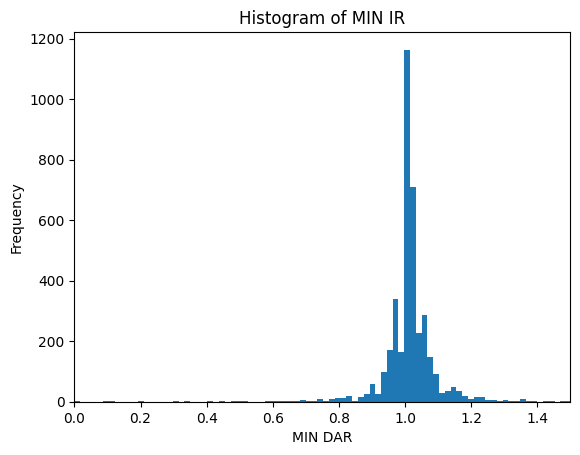

In [ ]:
# prompt: Create a histogram based on 'MIN IR' with more bins

plt.hist(df['MIN DAR'], bins=100)  # Adjust the number of bins as needed
plt.xlim([0,1.5])
plt.xlabel('MIN DAR')
plt.ylabel('Frequency')
plt.title('Histogram of MIN IR')
plt.show()


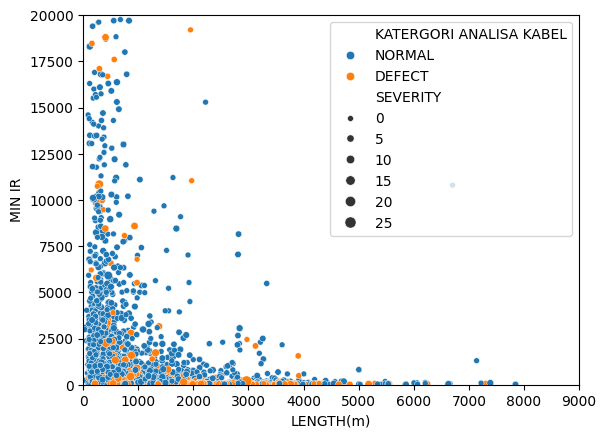

In [ ]:
sns.scatterplot(x='LENGTH(m)', y='MIN IR', data=df, size='SEVERITY', hue='KATERGORI ANALISA KABEL')
plt.xlim([0, 9000])
plt.ylim([0,20000])
plt.show()

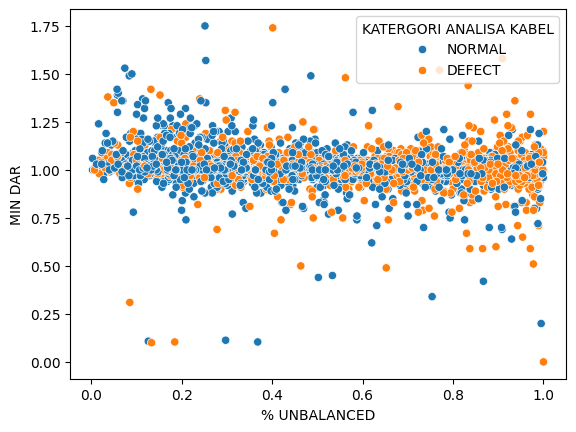

In [ ]:
sns.scatterplot(x='% UNBALANCED', y='MIN DAR', hue='KATERGORI ANALISA KABEL', data=df)
#plt.xlim([0, 9000])
#plt.ylim([0,10000])
plt.show()

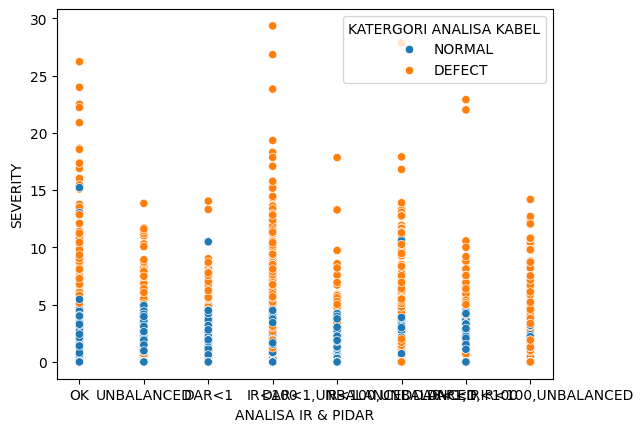

In [ ]:
sns.scatterplot(x='ANALISA IR & PIDAR', y='SEVERITY', hue='KATERGORI ANALISA KABEL', data=df)
#plt.xlim([0, 9000])
#plt.ylim([0,10000])
plt.show()

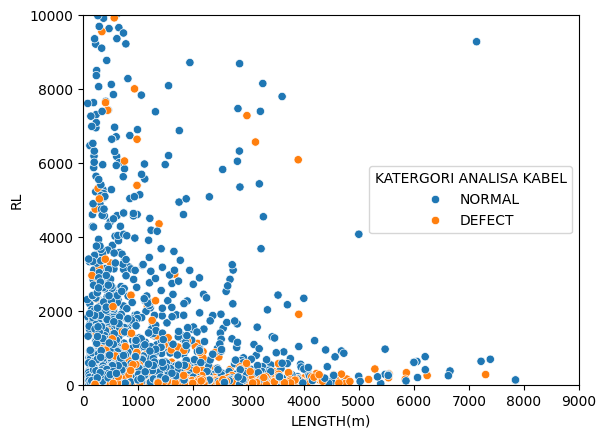

In [ ]:
sns.scatterplot(x='LENGTH(m)', y='RL', hue='KATERGORI ANALISA KABEL', data=df)
plt.xlim([0, 9000])
plt.ylim([0,10000])
plt.show()

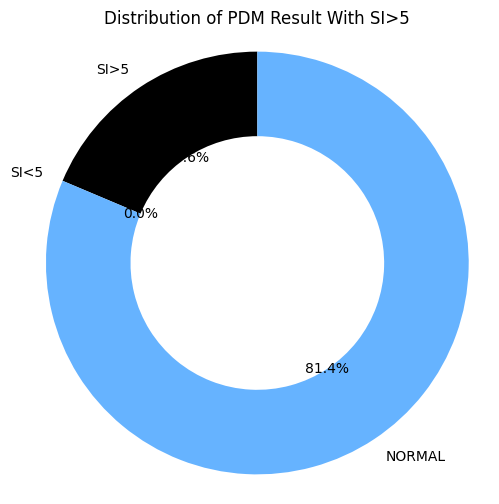

In [ ]:
# prompt: Build a donut chart of 'KATERGORI ANALISA KABEL' of how many 'DEFECT' vs 'NORMAL'

import matplotlib.pyplot as plt

# Count occurrences of 'DEFECT' and 'NORMAL' in 'KATERGORI ANALISA KABEL'
SIMore5_count = df[df['ANALISA KABEL CATEGORY'] == 'SI>5'].shape[0]
SILess5_count = df[df['ANALISA KABEL CATEGORY'] == 'SI<5'].shape[0]
normal_count = df[df['ANALISA KABEL CATEGORY'] == 'NORMAL'].shape[0]

# Data for the donut chart
labels = ['SI>5','SI<5', 'NORMAL']
sizes = [SIMore5_count, SILess5_count ,normal_count]
colors = ['000000','#ff9999','#66b3ff'] # Colors for the slices

# Create the donut chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4}) # width controls donut thickness
plt.title('Distribution of PDM Result With SI>5')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

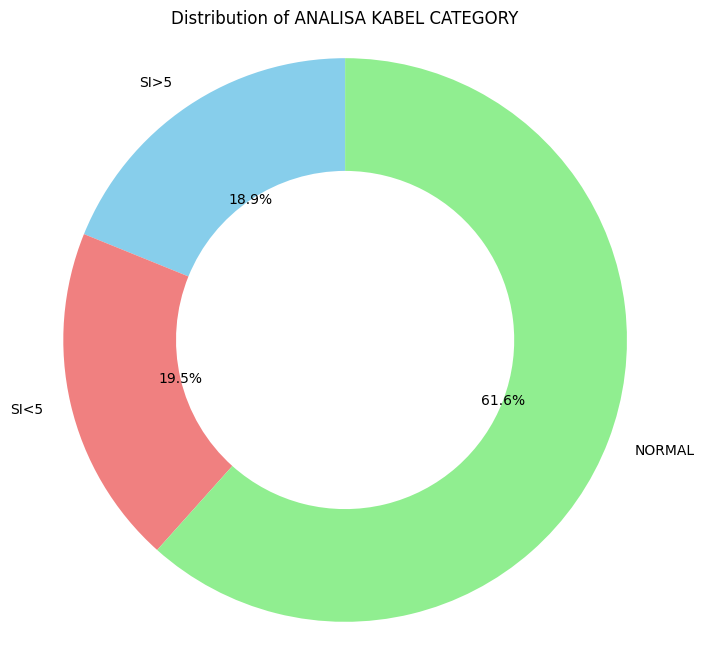

In [ ]:
# Assuming df is already loaded as in your provided code

# Count occurrences of 'SI>5', 'SI<5', and 'NORMAL' in 'ANALISA KABEL CATEGORY'
SIMore5_count = df[df['ANALISA KABEL CATEGORY'] == 'SI>5'].shape[0]
SILess5_count = df[df['ANALISA KABEL CATEGORY'] == 'SI<5'].shape[0]
normal_count = df[df['ANALISA KABEL CATEGORY'] == 'NORMAL'].shape[0]

# Data for the donut chart
labels = ['SI>5', 'SI<5', 'NORMAL']
sizes = [SIMore5_count, SILess5_count, normal_count]
colors = ['skyblue', 'lightcoral', 'lightgreen']  # Choose your desired colors

# Create the donut chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Distribution of ANALISA KABEL CATEGORY')
plt.axis('equal')  # Equal aspect ratio ensures the donut is circular
plt.show()

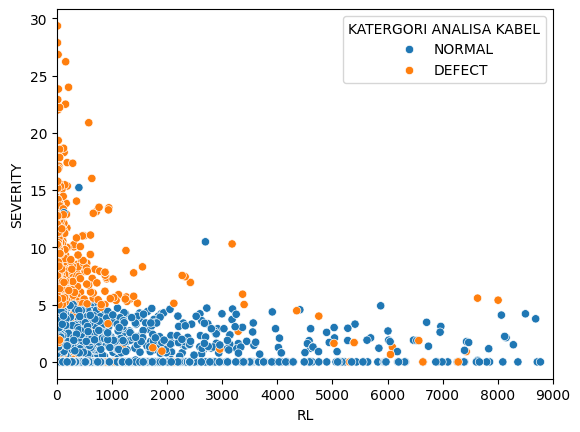

In [ ]:
sns.scatterplot(x='RL', y='SEVERITY', hue='KATERGORI ANALISA KABEL', data=df)
plt.xlim([0, 9000])
#plt.ylim([0,10000])
plt.show()

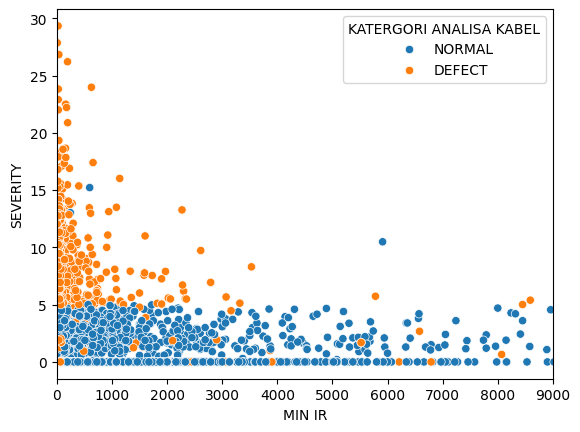

In [ ]:
sns.scatterplot(x='MIN IR', y='SEVERITY', hue='KATERGORI ANALISA KABEL', data=df)
plt.xlim([0, 9000])
#plt.ylim([0,10000])
plt.show()

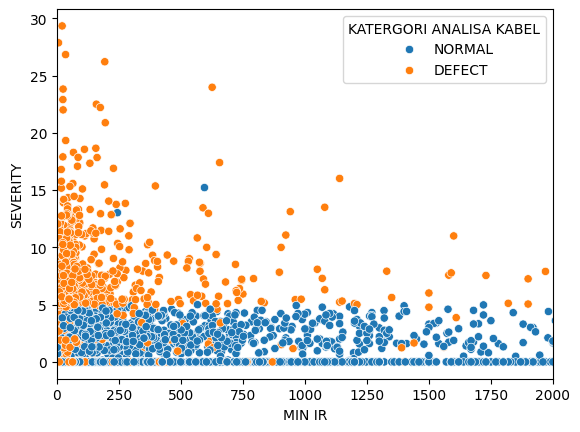

In [ ]:
sns.scatterplot(x='MIN IR', y='SEVERITY', hue='KATERGORI ANALISA KABEL', data=df)
plt.xlim([0, 2000])
#plt.ylim([0,50000])
plt.show()

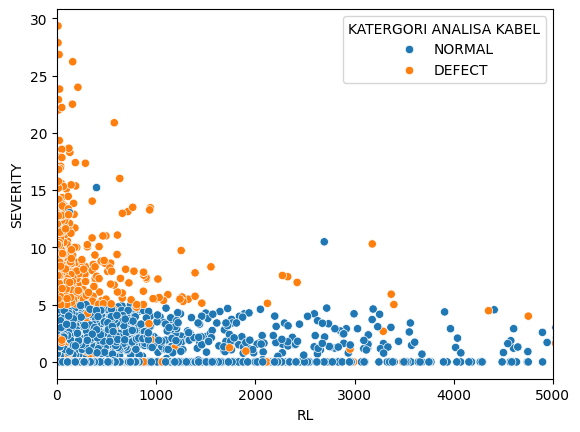

In [ ]:
sns.scatterplot(x='RL', y='SEVERITY', hue='KATERGORI ANALISA KABEL', data=df)
plt.xlim([0, 5000])
#plt.ylim([0,50000])
plt.show()

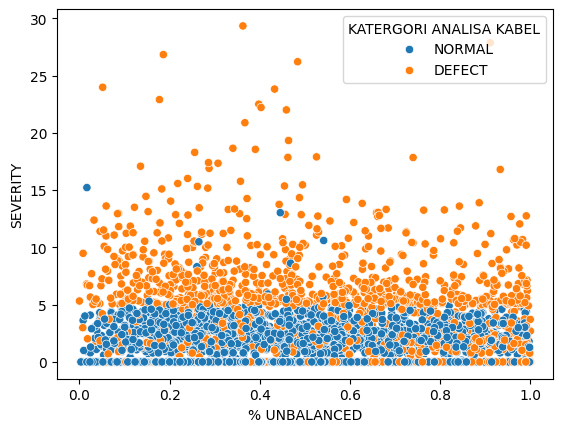

In [ ]:
sns.scatterplot(x='% UNBALANCED', y='SEVERITY', hue='KATERGORI ANALISA KABEL', data=df)
#plt.xlim([0, 5000])
#plt.ylim([0,50000])
plt.show()

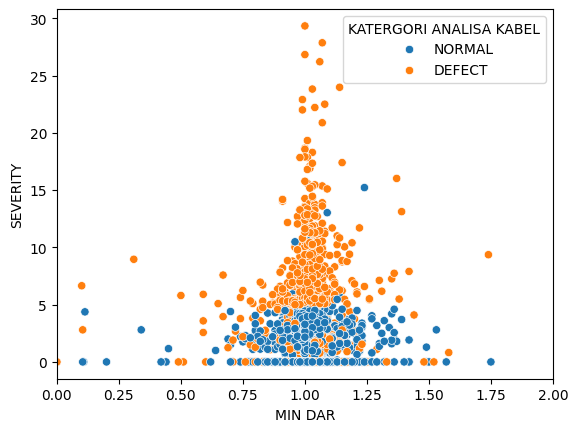

In [ ]:
sns.scatterplot(x='MIN DAR', y='SEVERITY', hue='KATERGORI ANALISA KABEL', data=df)
plt.xlim([0, 2])
#plt.ylim([0,50000])
plt.show()

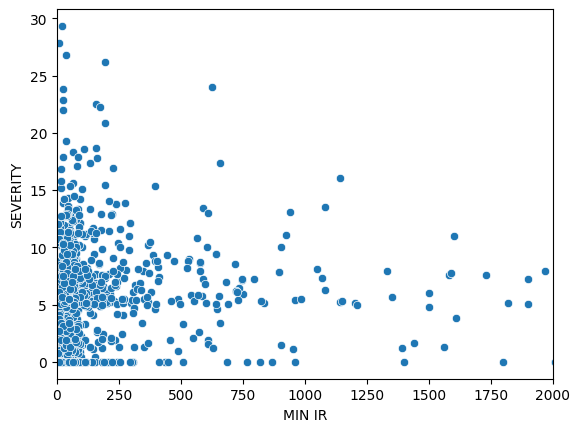

In [ ]:
sns.scatterplot(x='MIN IR', y='SEVERITY', data=df[df['KATERGORI ANALISA KABEL'] == 'DEFECT'])
plt.xlim([0, 2000])
#plt.ylim([0,10000])
plt.show()


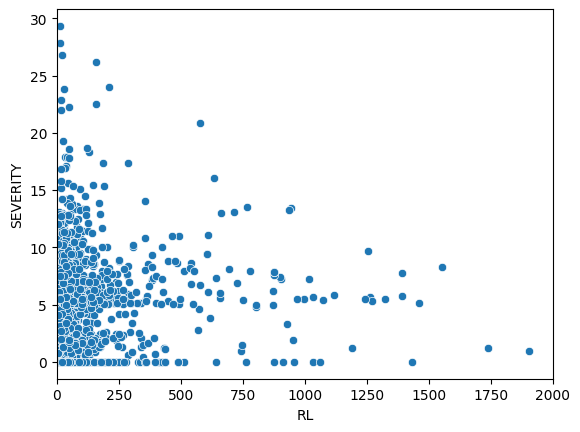

In [ ]:
sns.scatterplot(x='RL', y='SEVERITY', data=df[df['KATERGORI ANALISA KABEL'] == 'DEFECT'])
plt.xlim([0, 2000])
#plt.ylim([0,10000])
plt.show()


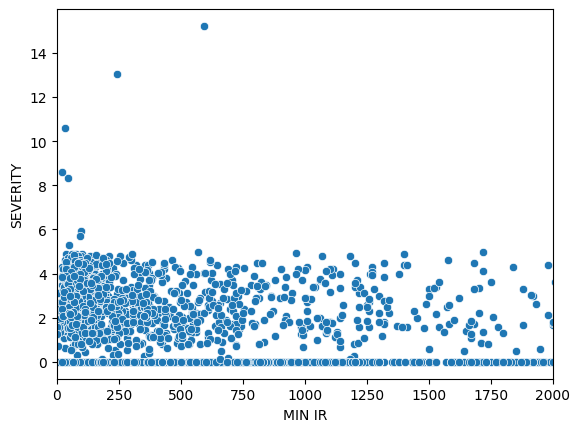

In [ ]:
sns.scatterplot(x='MIN IR', y='SEVERITY', data=df[df['KATERGORI ANALISA KABEL'] == 'NORMAL'])
plt.xlim([0, 2000])
#plt.ylim([0,10000])
plt.show()


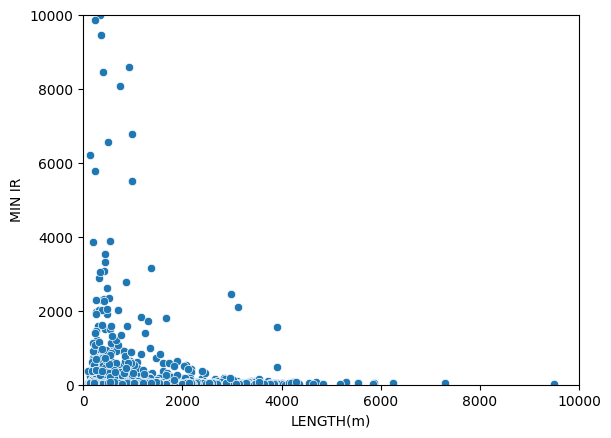

In [ ]:
sns.scatterplot(x='LENGTH(m)', y='MIN IR', data=df[df['KATERGORI ANALISA KABEL'] == 'DEFECT'])
plt.xlim([0, 10000])
plt.ylim([0,10000])
plt.show()


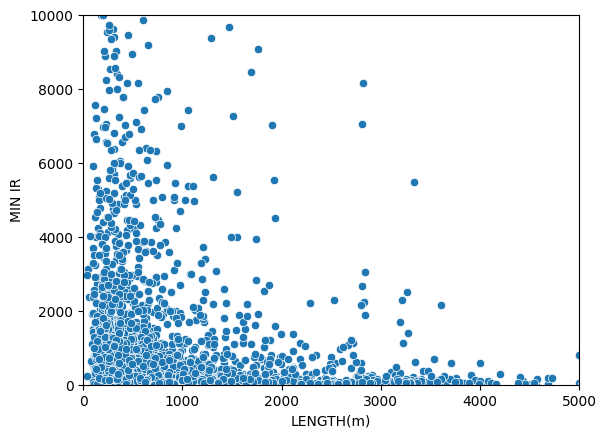

In [ ]:
sns.scatterplot(x='LENGTH(m)', y='MIN IR', data=df[df['KATERGORI ANALISA KABEL'] == 'NORMAL'])
plt.xlim([0, 5000])
plt.ylim([0,10000])
plt.show()


                MIN IR        RL   MIN DAR  % UNBALANCED  SEVERITY
MIN IR        1.000000  0.897845  0.261985     -0.074343 -0.067892
RL            0.897845  1.000000  0.244139     -0.072274 -0.067088
MIN DAR       0.261985  0.244139  1.000000     -0.156849  0.037746
% UNBALANCED -0.074343 -0.072274 -0.156849      1.000000 -0.028852
SEVERITY     -0.067892 -0.067088  0.037746     -0.028852  1.000000


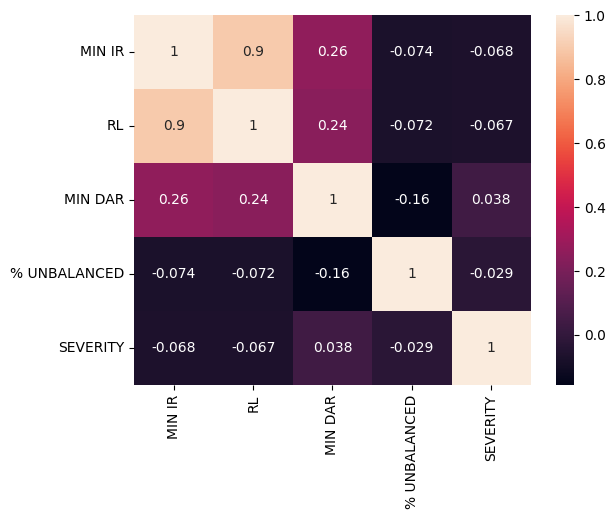

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ds = df[['MIN IR','RL','MIN DAR','% UNBALANCED','SEVERITY']]
corr = ds.corr()
print(ds.corr())
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
table = pd.pivot_table(df[df['SEVERITY']>=5], index=['ANALISA IR & PIDAR'],columns=['KATERGORI ANALISA KABEL'], aggfunc='size')
print(table)


KATERGORI ANALISA KABEL  DEFECT  NORMAL
ANALISA IR & PIDAR                     
DAR<1                      26.0     1.0
DAR<1,IR<100               50.0     1.0
DAR<1,IR<100,UNBALANCED    79.0     NaN
DAR<1,UNBALANCED           22.0     NaN
IR<100                    191.0     3.0
IR<100,UNBALANCED         156.0     2.0
OK                        140.0     4.0
UNBALANCED                 59.0     NaN


In [ ]:
pivot_table = df.pivot_table(index=['ANALISA IR & PIDAR'], columns=['KATERGORI ANALISA KABEL'], aggfunc='size', fill_value=0)
print(pivot_table)


KATERGORI ANALISA KABEL  DEFECT  NORMAL
ANALISA IR & PIDAR                     
DAR<1                        37     226
DAR<1,IR<100                 97      59
DAR<1,IR<100,UNBALANCED     212      75
DAR<1,UNBALANCED             54     238
IR<100                      390     248
IR<100,UNBALANCED           425     136
OK                          167     921
UNBALANCED                  100     505


In [ ]:
pivot_table_DAR = df.pivot_table(index=['ALL PHASE DAR < 1?'], columns=['KATERGORI ANALISA KABEL'], aggfunc='size', fill_value=0)
print(pivot_table_DAR)

KATERGORI ANALISA KABEL  DEFECT  NORMAL
ALL PHASE DAR < 1?                     
NO                         1451    2341
YES                          31      67


Text(0.5, 1.0, 'DAR < 1 Hitrate')

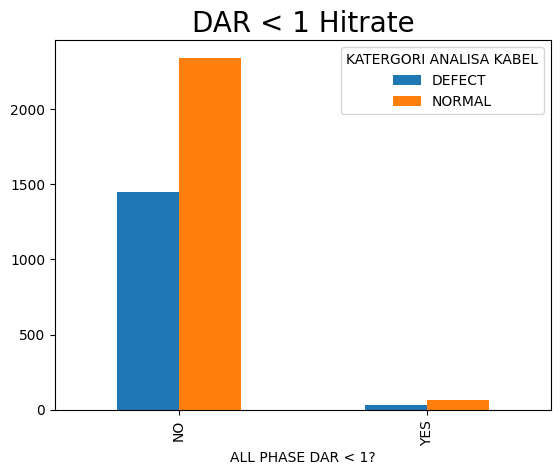

In [ ]:
DAR_chart = pivot_table_DAR.plot.bar()
DAR_chart.set_title('DAR < 1 Hitrate', fontsize=20)
#ax.set_ylim(0,700)
#ax.set_xticklabels(['A','B','C'], rotation=0)

In [ ]:
pivot_table_DAR_1fasa = df.pivot_table(index=['DAR<1?'], columns=['KATERGORI ANALISA KABEL'], aggfunc='size', fill_value=0)
print(pivot_table_DAR_1fasa)

KATERGORI ANALISA KABEL  DEFECT  NORMAL
DAR<1?                                 
DAR<1                       400     598
DAR>1                      1082    1810


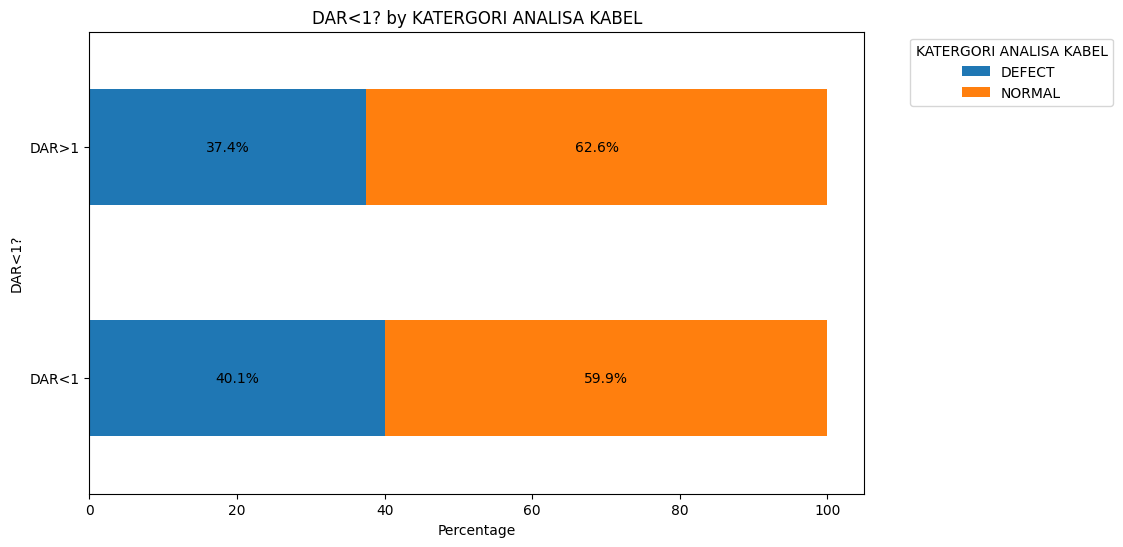

In [ ]:
pivot_table_DAR_1fasa_percentage = pivot_table_DAR_1fasa.div(pivot_table_DAR_1fasa.sum(axis=1), axis=0) * 100

ax = pivot_table_DAR_1fasa_percentage.plot(kind='barh', stacked=True, figsize=(10, 6))

for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('DAR<1? by KATERGORI ANALISA KABEL')
plt.xlabel('Percentage')
plt.ylabel('DAR<1?')
plt.legend(title='KATERGORI ANALISA KABEL', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
pivot_table_unbalanced = df.pivot_table(index=['UNBALANCED?'], columns=['KATERGORI ANALISA KABEL'], aggfunc='size', fill_value=0)
print(pivot_table_unbalanced)

KATERGORI ANALISA KABEL  DEFECT  NORMAL
UNBALANCED?                            
BALANCED                    691    1454
UNBALANCED                  791     954


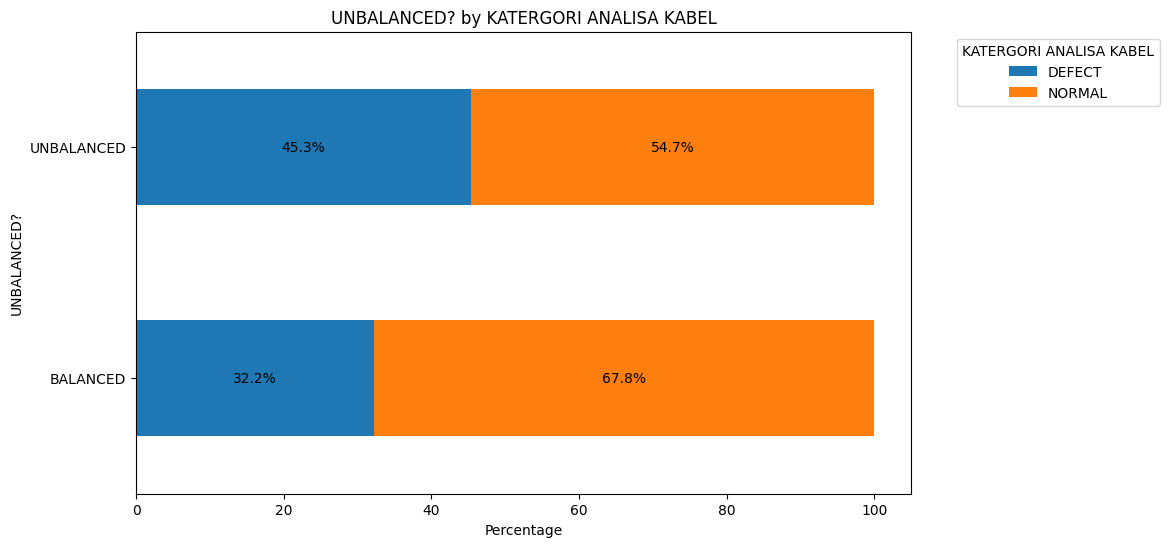

In [ ]:
pivot_table_unbalanced_percentage = pivot_table_unbalanced.div(pivot_table_unbalanced.sum(axis=1), axis=0) * 100

ax = pivot_table_unbalanced_percentage.plot(kind='barh', stacked=True, figsize=(10, 6))

for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('UNBALANCED? by KATERGORI ANALISA KABEL')
plt.xlabel('Percentage')
plt.ylabel('UNBALANCED?')
plt.legend(title='KATERGORI ANALISA KABEL', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
pivot_table_IR = df.pivot_table(index=['IR<100?'], columns=['KATERGORI ANALISA KABEL'], aggfunc='size', fill_value=0)
print(pivot_table_IR)

KATERGORI ANALISA KABEL  DEFECT  NORMAL
IR<100?                                
NO                          358    1890
YES                        1124     518


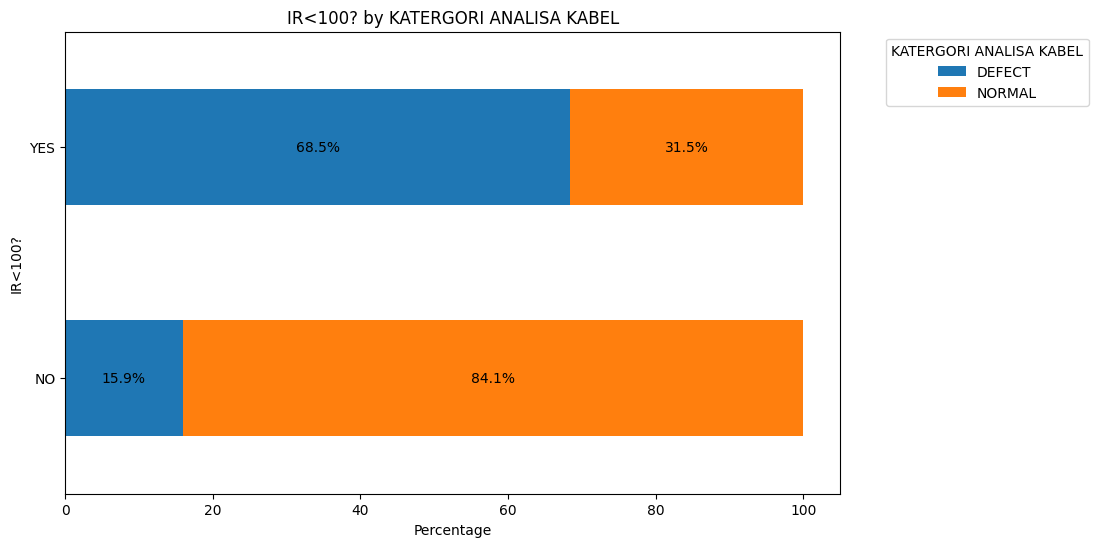

In [ ]:
pivot_table_IR_percentage = pivot_table_IR.div(pivot_table_IR.sum(axis=1), axis=0) * 100

ax = pivot_table_IR_percentage.plot(kind='barh', stacked=True, figsize=(10, 6))

for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('IR<100? by KATERGORI ANALISA KABEL')
plt.xlabel('Percentage')
plt.ylabel('IR<100?')
plt.legend(title='KATERGORI ANALISA KABEL', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0.5, 1.0, 'Bilangan Defect Mengikut Kategori Analisa IR & PIDAR')

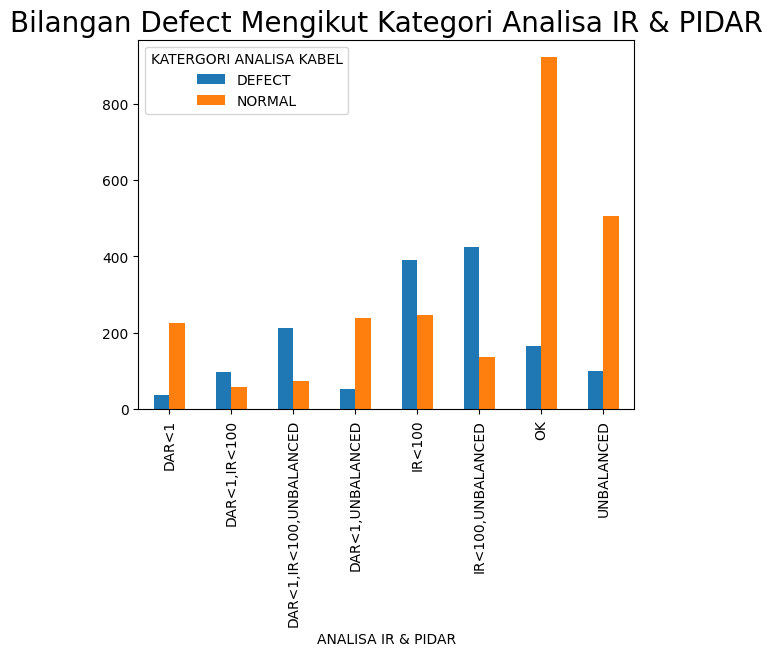

In [ ]:
ax = pivot_table.plot.bar()
ax.set_title('Bilangan Defect Mengikut Kategori Analisa IR & PIDAR', fontsize=20)
#ax.set_ylim(0,700)
#ax.set_xticklabels(['A','B','C'], rotation=0)

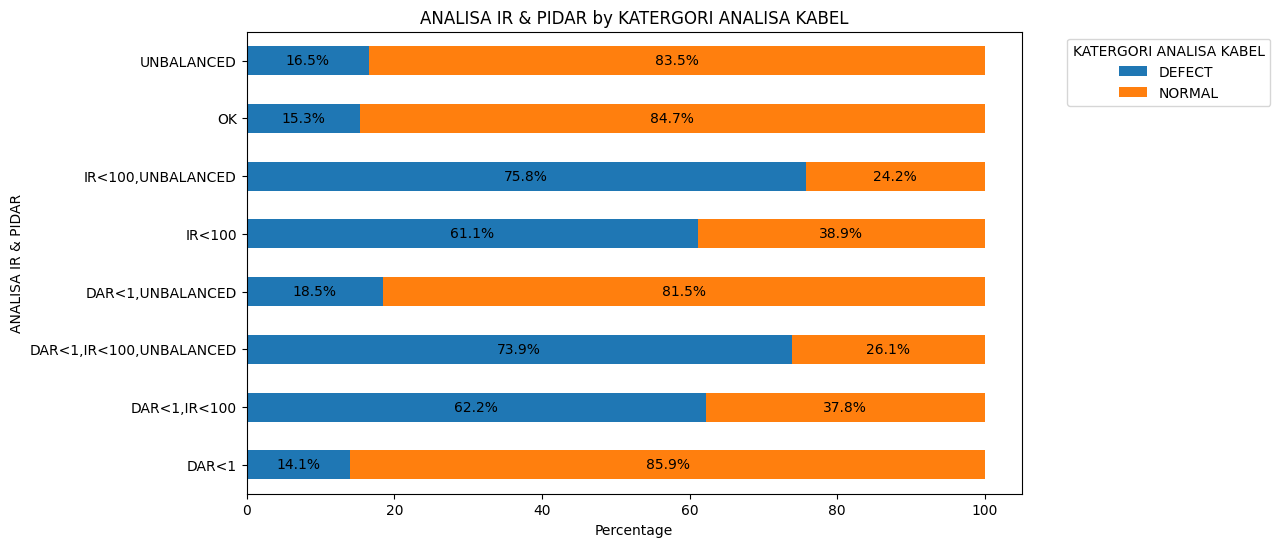

In [ ]:
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

ax = pivot_table_percentage.plot(kind='barh', stacked=True, figsize=(10, 6))

for pao in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('ANALISA IR & PIDAR by KATERGORI ANALISA KABEL')
plt.xlabel('Percentage')
plt.ylabel('ANALISA IR & PIDAR')
plt.legend(title='KATERGORI ANALISA KABEL', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame
features = df[['MIN IR','LENGTH(m)','% UNBALANCED']]
target = df['KATERGORI ANALISA KABEL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

# Create a Random Forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7789203084832905


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print(cr)


Confusion Matrix:
[[202  93]
 [ 79 404]]
              precision    recall  f1-score   support

      DEFECT       0.72      0.68      0.70       295
      NORMAL       0.81      0.84      0.82       483

    accuracy                           0.78       778
   macro avg       0.77      0.76      0.76       778
weighted avg       0.78      0.78      0.78       778



In [ ]:
# Assuming 'new_df' is your new DataFrame with the same structure as 'df'

file_id_new = '14qs77MVtvCbI84CrhLrwZwgyApnDBYt9'
link_new = f'https://drive.google.com/uc?id={file_id_new}'
new_df = pd.read_excel(link_new)

new_features = new_df[['MIN IR','LENGTH(m)','% UNBALANCED']]
new_target = new_df['KATERGORI ANALISA KABEL']

# Make predictions on the new dataset using the trained model
new_y_pred = model.predict(new_features)

# Evaluate the model on the new dataset
new_accuracy = accuracy_score(new_target, new_y_pred)
print("Accuracy on new dataset:", new_accuracy)

# Generate the confusion matrix for the new dataset
new_cm = confusion_matrix(new_target, new_y_pred)

# Print the confusion matrix for the new dataset
print("Confusion Matrix on new dataset:")
print(new_cm)

new_cr = classification_report(new_target, new_y_pred)
print(new_cr)


Accuracy on new dataset: 0.6924643584521385
Confusion Matrix on new dataset:
[[164  66]
 [ 85 176]]
              precision    recall  f1-score   support

      DEFECT       0.66      0.71      0.68       230
      NORMAL       0.73      0.67      0.70       261

    accuracy                           0.69       491
   macro avg       0.69      0.69      0.69       491
weighted avg       0.70      0.69      0.69       491



In [ ]:
result_df = pd.DataFrame({
    'STATION': new_df['STATION'],
    'LINK NO' : new_df['CABLE ID'],
    '% UNBALANCED': new_df['% UNBALANCED'],
    'MIN IR': new_df['MIN IR'],
    'LENGTH(m)': new_df['LENGTH(m)'],
    'RL': new_df['RL'],
    'MIN DAR': new_df['MIN DAR'],
    'SEVERITY': new_df['SEVERITY'],
    'Actual Kategori': new_target,
    'Predicted Kategori': new_y_pred
})

result_df


NameError: name 'pd' is not defined

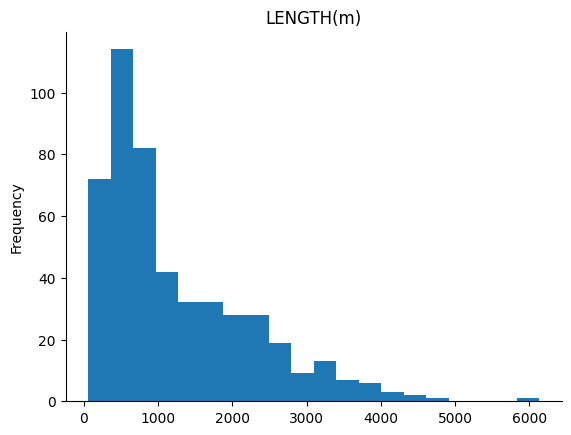

In [ ]:
# @title LENGTH(m)

from matplotlib import pyplot as plt
result_df['LENGTH(m)'].plot(kind='hist', bins=20, title='LENGTH(m)')
plt.gca().spines[['top', 'right',]].set_visible(False)